# Titanic study of a Disaster #
Here we want to present a study to predict the survive probability of a passenger on the Titanic given their basic information.

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from IPython.display import display, HTML


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

We start loading the dataset.

In [2]:
df_train = pd.read_csv('dataset_train.csv')
df_test = pd.read_csv('dataset_test_labeled_2.csv')

And we look at the basic info of the dataframe.

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  WikiId       889 non-null    float64
 13  Name_wiki    889 non-null    object 
 14  Age_wiki     887 non-null    float64
 15  Hometown     889 non-null    object 
 16  Boarded      889 non-null    object 
 17  Destination  889 non-null    object 
 18  Lifeboat     345 non-null    object 
 19  Body    

As wee see there are at maximum 891 entries and we need data manipulation because we have for example a very small number of entries for cabin. Here Sibsp is the number of siblings/spouse a passenger has on the Titanic, while Parch is the number od parent/children a passenger has. In more details we can see the missing data with the following analysis

In [4]:
total = df_train.isnull().sum().sort_values(ascending = False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
missing_data = pd.concat([total,percent_1], axis=1, keys=['Total','%'])
missing_data

,Total,%
Body,804,90.235690
Cabin,687,77.104377
Lifeboat,546,61.279461
Age,177,19.865320
Age_wiki,4,0.448934
WikiId,2,0.224467
Embarked,2,0.224467
Class,2,0.224467
Name_wiki,2,0.224467
Hometown,2,0.224467


Therefore we are likely going to drop Body, Cabin and Lifeboat. Moreover we are going to use the Wikipedia stored ages instead the one provided. Next we look a little bit more in detail what the table has.

In [5]:
df_train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,...,Q,785.0,"Doherty, Mr. William John (aka ""James Moran"")",22.0,"Cork, Ireland",Queenstown,New York City,NaN,NaN,3.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,S,200.0,"McCarthy, Mr. Timothy J.",54.0,"Dorchester, Massachusetts, US",Southampton,"Dorchester, Massachusetts, US",NaN,175MB,1.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,S,1108.0,"Pålsson, Master Gösta Leonard",2.0,"Bjuv, Skåne, Sweden",Southampton,"Chicago, Illinois, US",NaN,NaN,3.0


A brief analysis on the data

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,887.000000,889.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,665.466817,29.322063,2.307087
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,380.796997,13.930089,0.837713
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.420000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,336.000000,20.000000,2.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,672.000000,28.000000,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,996.000000,38.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1314.000000,74.000000,3.000000


In our set of data we see that roughly the 38% of the passenger survived the average age is 14 years old and traveled on second class. The average cost of the tickets was 32 dolloars. We noe start to refine the data dropping the columns that repeat the same data.

In [7]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d = d.drop(['Age','Class','Boarded'],axis =1)
    d = d.rename(columns={'Age_wiki':'Age'})
    if i == 0: df_train = d;
    else: df_test = d;


In [8]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  WikiId       889 non-null    float64
 12  Name_wiki    889 non-null    object 
 13  Age          887 non-null    float64
 14  Hometown     889 non-null    object 
 15  Destination  889 non-null    object 
 16  Lifeboat     345 non-null    object 
 17  Body         87 non-null     object 
dtypes: float64(4), int64(4), object(10)
memory usage: 

We know start to see if there is any correlation between the class, the sex, the age and the probability to survive. 

In [9]:
women = df_train[df_train['Sex']=='female']
men = df_train[df_train['Sex']=='male']
print('the percentage of women survived is: %{}'.format(round(women['Survived'][women['Survived']==1].sum()/women['Survived'].count()*100,1)))
print('the percentage of men survived is: %{}'.format(round(men['Survived'][men['Survived']==1].sum()/men['Survived'].count()*100,1)))

the percentage of women survived is: %74.2
the percentage of men survived is: %18.9


So there is a relation between the gender and the probability to survive. We know perfeorm a first check wether also the class contribute to survive.

In [10]:
df_exploration = df_train[['Survived','Sex','Age','Pclass']]
df_exploration = pd.concat([df_exploration,pd.get_dummies(df_exploration['Sex']),pd.get_dummies(df_exploration['Pclass'])], axis =1)
df_exploration = df_exploration.drop(['Sex','Pclass'],axis =1)
df_exploration.corr()

,Survived,Age,female,male,1,2,3
Survived,1.000000,-0.049798,0.543351,-0.543351,0.285904,0.093349,-0.322308
Age,-0.049798,1.000000,-0.081519,0.081519,0.376740,0.012646,-0.334833
female,0.543351,-0.081519,1.000000,-1.000000,0.098013,0.064746,-0.137143
male,-0.543351,0.081519,-1.000000,1.000000,-0.098013,-0.064746,0.137143
1,0.285904,0.376740,0.098013,-0.098013,1.000000,-0.288585,-0.626738
2,0.093349,0.012646,0.064746,-0.064746,-0.288585,1.000000,-0.565210
3,-0.322308,-0.334833,-0.137143,0.137143,-0.626738,-0.565210,1.000000


Seems there is an inverse correlation between surviving and the Age. Moreover there is a direct relation between the 1st and 2nd class with surviving while the 3rd class seem have more probability to not survive. We start analyse in more detail the probability to survive of men and women with respect to their age.

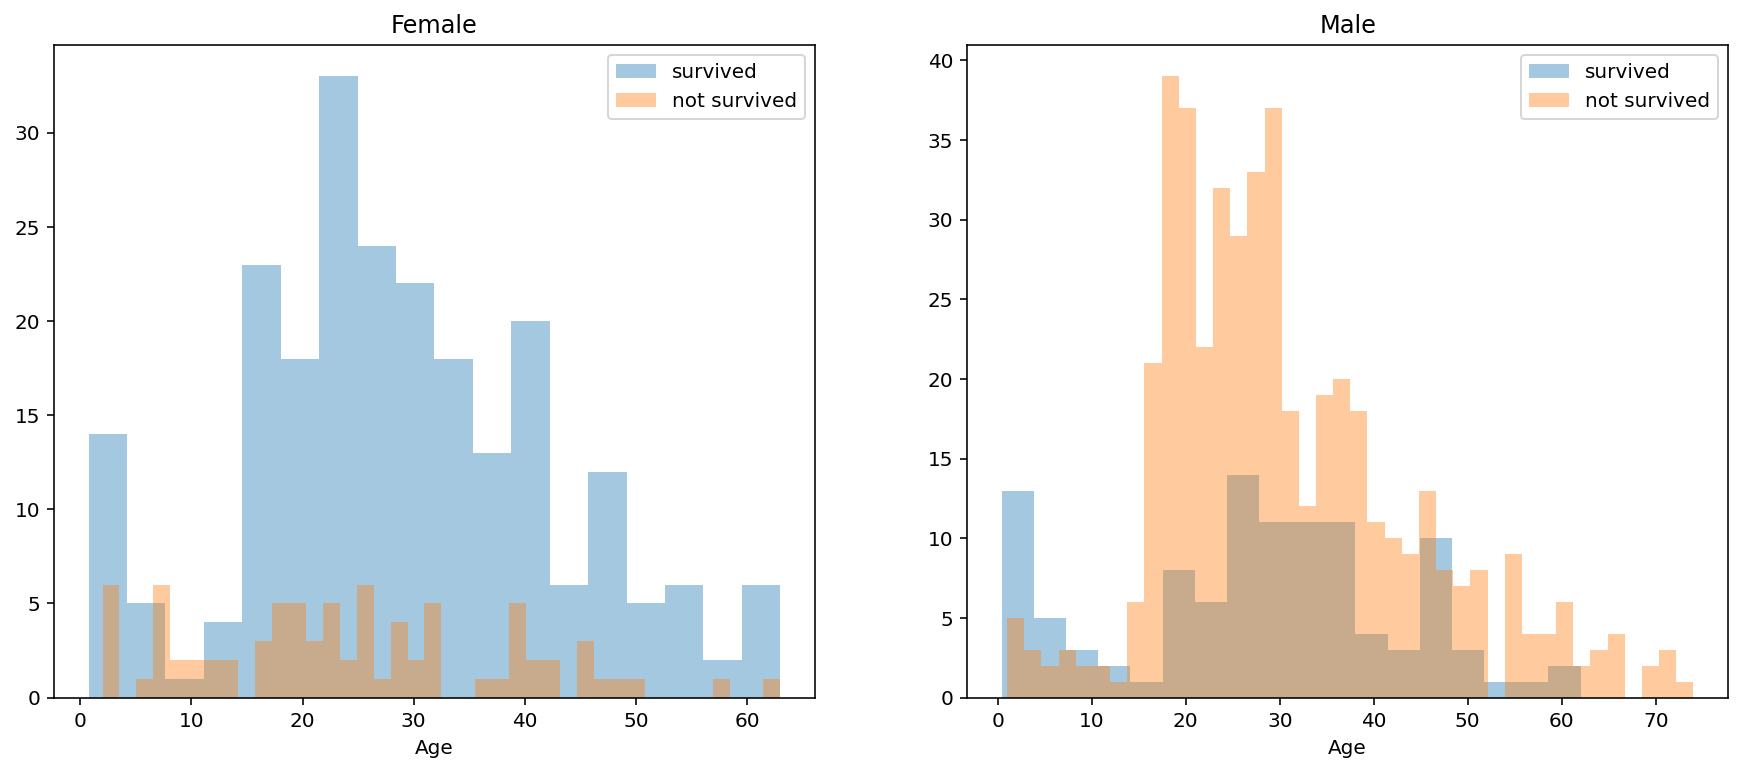

In [11]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, axlabel = 'Age',label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, axlabel = 'Age', label = survived, ax = axes[1], kde =False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Male');


From the plots we see that men between 18 and 30 have higher probability to survive. For the women we have a wider interval 14-40. Now we look in more detail how the class the sex and the embarked position are related to survive.

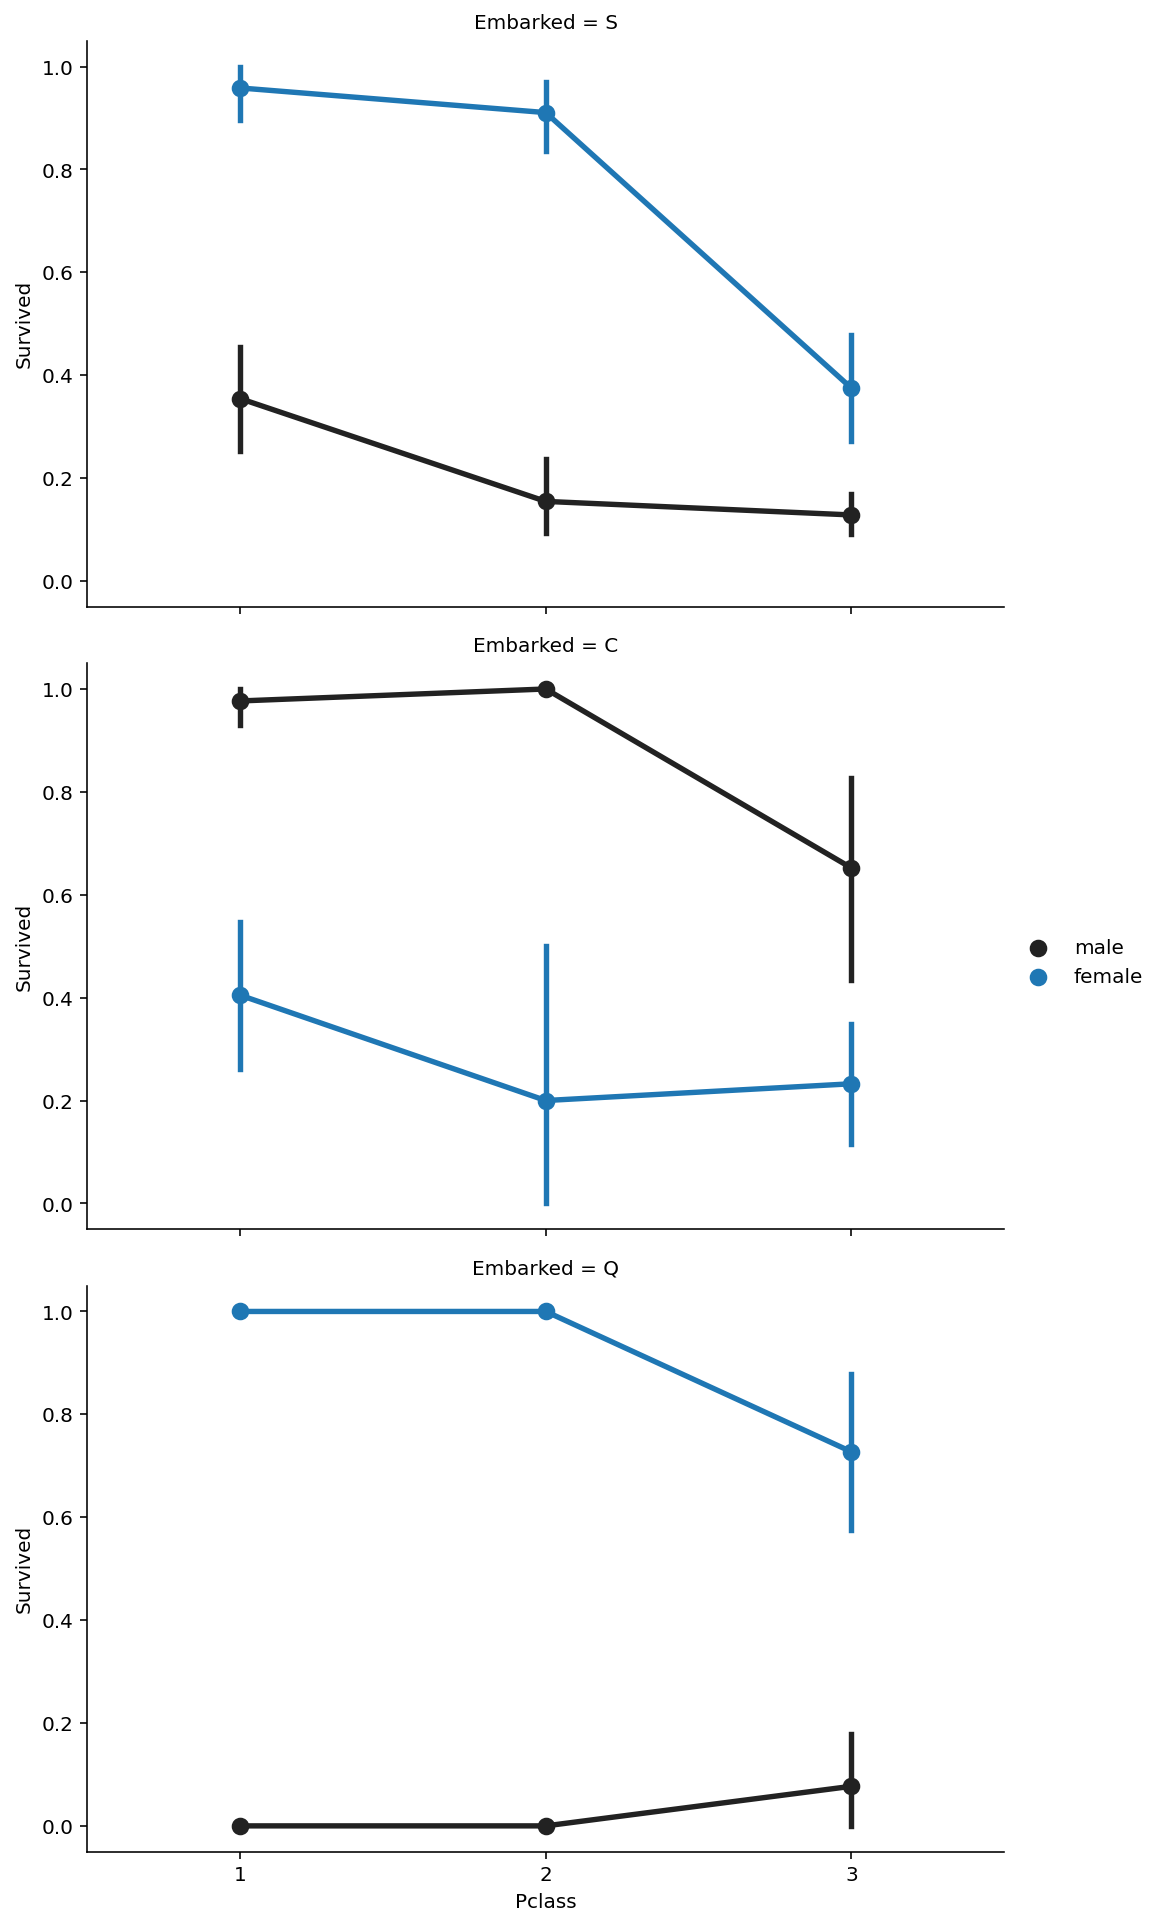

In [12]:
FacetGrid = sns.FacetGrid(df_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Therefore we deduce that women embarked at S (Southampton) and Q (Queenstown) have high possibility to survive, exactly the opposite of the men. For them only the one embarked at point C (Cherbourg) have the highest probability to survive. It is a common behaviour that people from the 1st class have the highest probability to survive has we have notice from the previous table. More in detail

In [13]:
print('Percentage of 3rd class men that survived: %{}'.format(round(men['Survived'][(men['Pclass']==3) & (men['Survived']==1)].count()/men['Survived'][men['Pclass']==3].count()*100,1)))
print('Percentage of 2nd class men that survived: %{}'.format(round(men['Survived'][(men['Pclass']==2) & (men['Survived']==1)].count()/men['Survived'][men['Pclass']==2].count()*100,1)))
print('Percentage of 1st class men that survived: %{}'.format(round(men['Survived'][(men['Pclass']==1) & (men['Survived']==1)].count()/men['Survived'][men['Pclass']==1].count()*100,1)))

Percentage of 3rd class men that survived: %13.5
Percentage of 2nd class men that survived: %15.7
Percentage of 1st class men that survived: %36.9


In [14]:
print('Percentage of 3rd class women that survived: %{}'.format(round(women['Survived'][(women['Pclass']==3) & (women['Survived']==1)].count()/women['Survived'][women['Pclass']==3].count()*100,1)))
print('Percentage of 2nd class women that survived: %{}'.format(round(women['Survived'][(women['Pclass']==2) & (women['Survived']==1)].count()/women['Survived'][women['Pclass']==2].count()*100,1)))
print('Percentage of 1st class women that survived: %{}'.format(round(women['Survived'][(women['Pclass']==1) & (women['Survived']==1)].count()/women['Survived'][women['Pclass']==1].count()*100,1)))

Percentage of 3rd class women that survived: %50.0
Percentage of 2nd class women that survived: %92.1
Percentage of 1st class women that survived: %96.8


that we can see also from this plot (putting together the previous data)

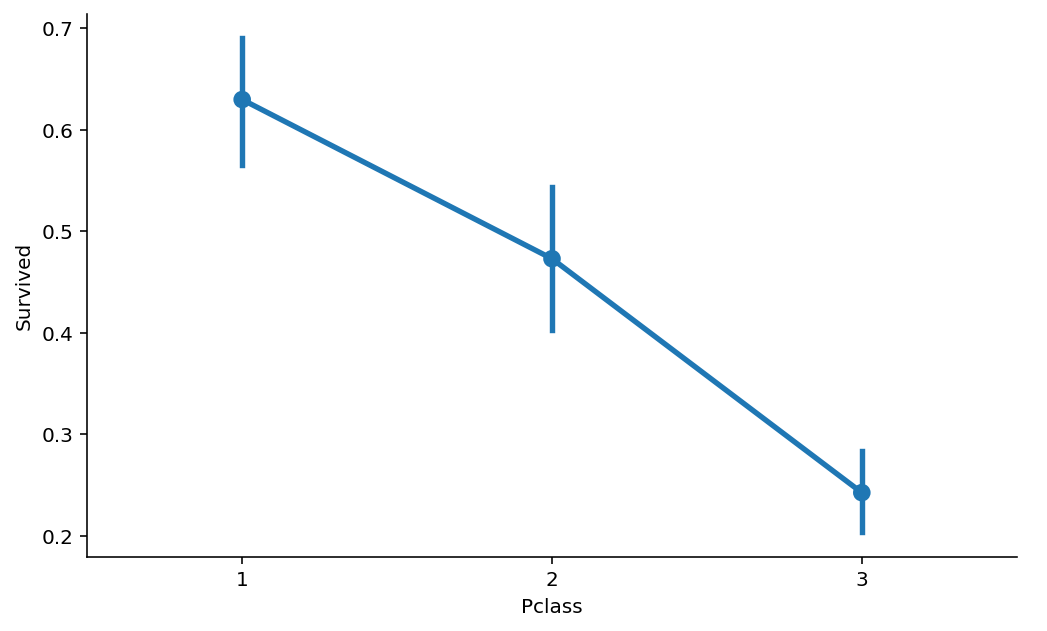

In [15]:
FacetGrid = sns.FacetGrid(df_train, height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

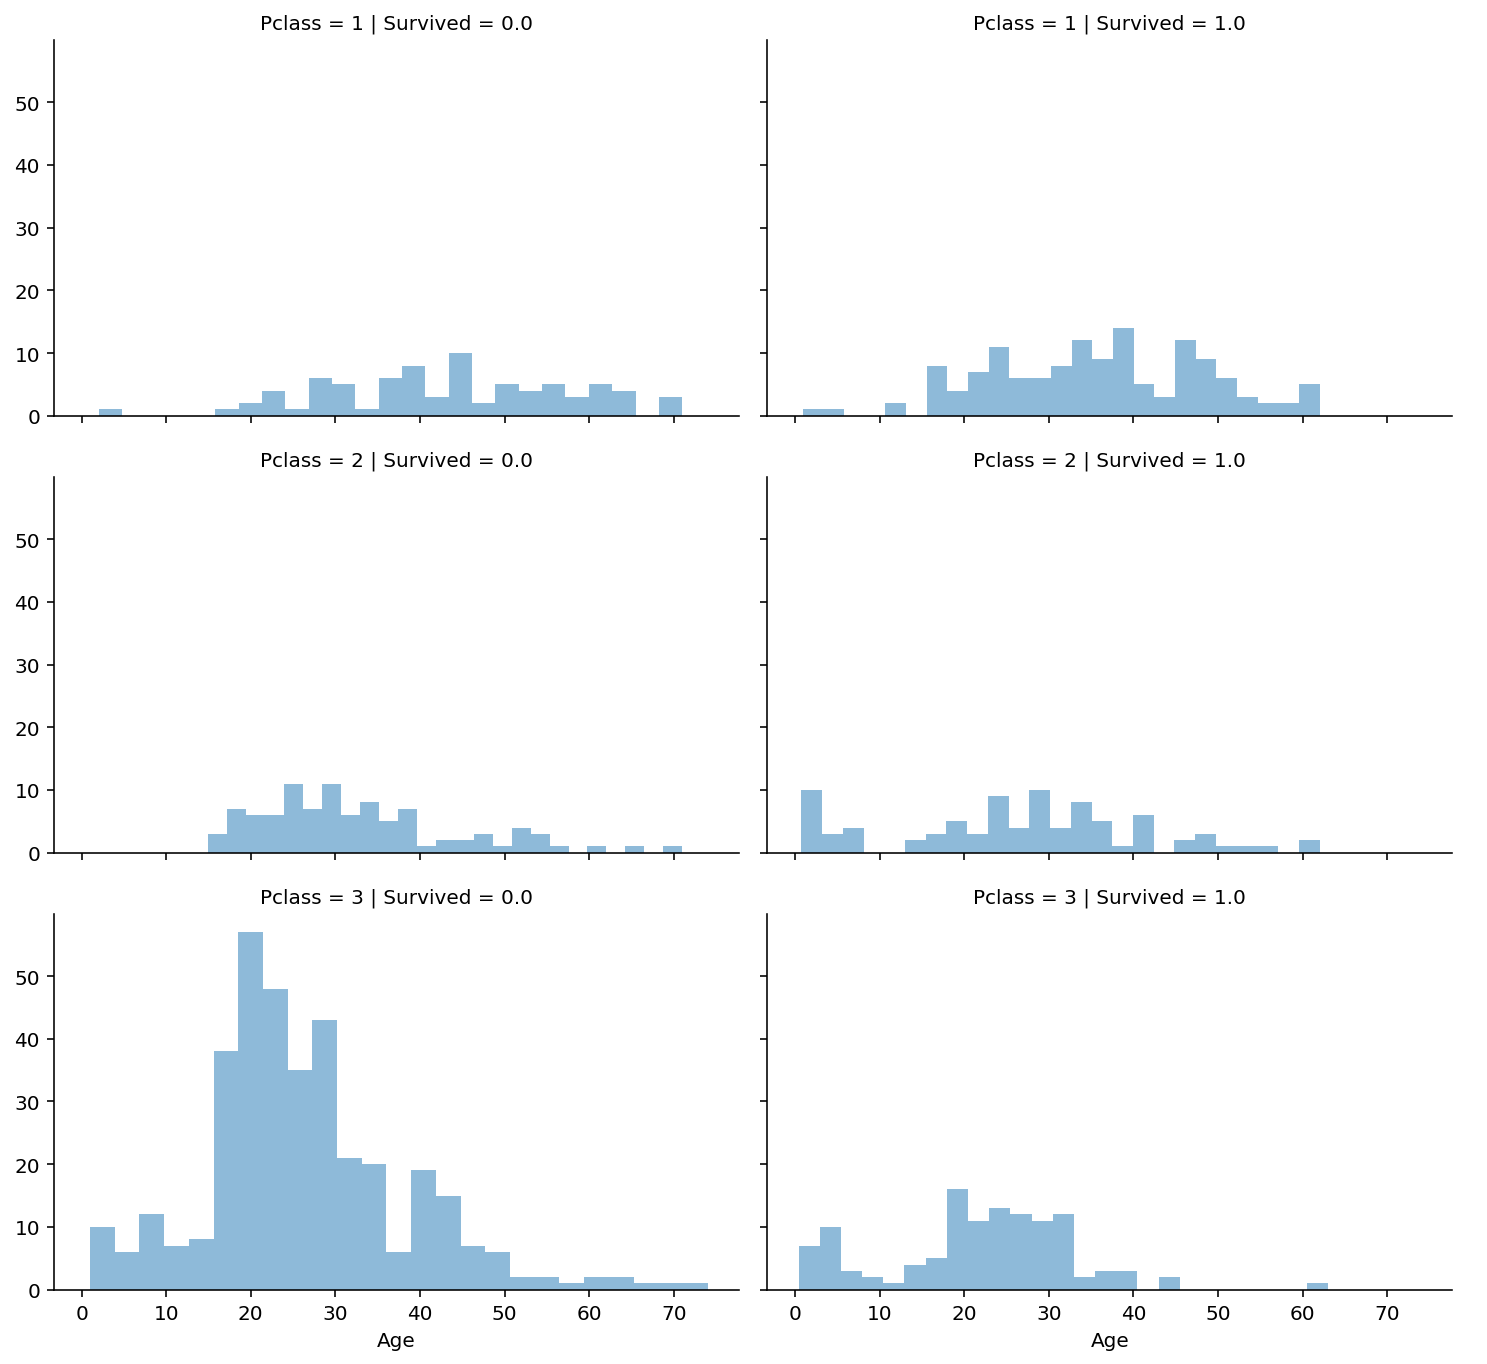

In [16]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', height=3.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=25)
grid.add_legend();

Again we can see that 1st class passengers have the highest probability to survive while the 3rd class passengers have the highest orobability to die. 

Next we would like to see how having member of the family onboard impacted on the probability to survive.

In [17]:
data = [df_train, df_test]
for i,d in enumerate(data):
    d['relatives'] = d['SibSp']+d['Parch']
    d.loc[d['relatives'] > 0, 'not_alone'] = 0
    d.loc[d['relatives'] == 0, 'not_alone'] = 1
    d['not_alone'] = d['not_alone'].astype(int)
    if i == 0: df_train = d
    else: df_test = d
print(df_train['not_alone'].value_counts())
df_train[['not_alone','relatives']].head(8)

1    537
0    354
Name: not_alone, dtype: int64


,not_alone,relatives
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,1,0
7,0,4


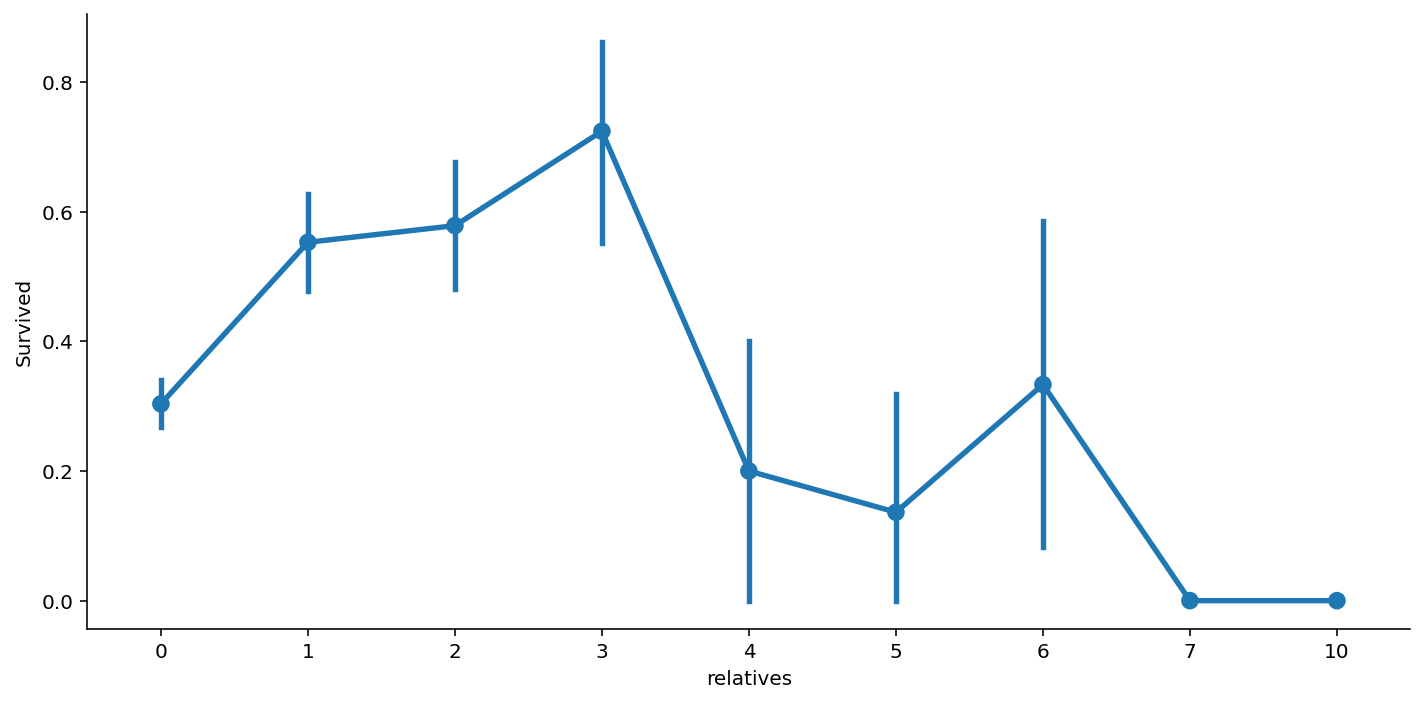

In [18]:
axes = sns.catplot('relatives', 'Survived', data = df_train, kind = 'point', aspect = 2)

We notice that the probability is higher if you have between 1 to 3 relatives. People with no relatives or 6 have a close probability to survive even though is still lower then the higher probability (except some case with 6 relatives).

## Data Preprocessing ##

Before run the machine learning algorithm we need to clear and select our features. At the start we have seen that some entries like Cabin and Age have missing data. We now proceed to fill (if possible) the missing data.

In [19]:
print(df_train['Cabin'][df_train['Cabin'].isnull()==False])
df_train['Cabin'].iloc[339]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object


'T'

Here the Cabin column has a lot of missing data but it is particular interesting that the first letter of the cabin refers to the deck in which the cabin is allocated. We then create a new feature -Deck- that contains this information. We then converts the Deck entries in numerical values and we give the value 0 for the unknown entries.

In [20]:
import re
deck = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7 , 'T' :0, 'U':8}
data = [df_train,df_test]
for i,d in enumerate(data):
    d['Cabin'] = d['Cabin'].fillna('U0')
    d['Deck'] = d['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    d['Deck'] = d['Deck'].map(deck)
    d['Deck'] = d['Deck'].astype(int)
    d = d.drop(['Cabin'],axis = 1)
    if i == 0: df_train =d
    else: df_test = d

For the Age we fill the missing value with a random integer in the range [mean-std,mean+std].

In [21]:
data = [df_train,df_test]
mean_age = df_train['Age'].mean()
st_d = df_test['Age'].std()
for i,d in enumerate(data):
    mean_age = d['Age'].mean()
    st_d = d['Age'].std()
    d['Age'] = d['Age'].fillna(np.random.randint(mean_age-st_d,mean_age+st_d))
    if i == 0: df_train =d
    else: df_test = d

df_train['Age'].isnull().sum()

0

In [22]:
df_train['Age'] = df_train['Age'].astype(int)

For the Embark missing value we fill them with the mode (the most frequent value). 

In [23]:
print(df_train['Embarked'].mode())
data = [df_train,df_test]
for i,d in enumerate(data):
    d['Embarked'] = d['Embarked'].fillna('S')
    if i == 0: df_train =d
    else: df_test = d

df_train['Embarked'].isnull().sum()

0    S
dtype: object


0

Now we drop some information with not useful data for our prediction algorith. For example Hometown,Destination, Body and in which Lifeboat some survivors were found does not influenced too much. We will drop also the name but before that we will extrapolate a little bit of information from them. This is because they contains Title and this can have some effect on the probability to be saved. 

In [24]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d = d.drop(['WikiId','Name_wiki', 'Hometown', 'Destination', 'Lifeboat', 'Body', 'Ticket'], axis =1)
    if i == 0: df_train =d
    else: df_test = d
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Age          891 non-null    int64  
 10  relatives    891 non-null    int64  
 11  not_alone    891 non-null    int64  
 12  Deck         891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB


In [25]:
df_train = df_train.drop(['PassengerId'], axis =1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    float64
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Age        891 non-null    int64  
 9   relatives  891 non-null    int64  
 10  not_alone  891 non-null    int64  
 11  Deck       891 non-null    int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 83.7+ KB


In [26]:
df_train[['Survived','Fare']] = df_train[['Survived','Fare']].astype(int)
df_test['Fare']=df_test['Fare'].fillna(df_test['Fare'].mean())
df_test['Fare'] = df_test['Fare'].astype(int)

For the Name we want to extract the Title from the names and then we want to convert them into integers. First of all let see which kind of Title we have. 

In [27]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    if i == 0: df_train =d
    else: df_test = d
print(df_train['Title'].unique())
[(Title,df_train['Title'][df_train['Title']== Title].count()) for Title in df_train['Title'].unique()]

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


[('Mr', 517),
 ('Mrs', 125),
 ('Miss', 182),
 ('Master', 40),
 ('Don', 1),
 ('Rev', 6),
 ('Dr', 7),
 ('Mme', 1),
 ('Ms', 1),
 ('Major', 2),
 ('Lady', 1),
 ('Sir', 1),
 ('Mlle', 2),
 ('Col', 2),
 ('Capt', 1),
 ('Countess', 1),
 ('Jonkheer', 1)]

Thus does make sense categorise them in the following: Mr., Miss., Mrs., Master, Rare. Note also that we have titles like Mlle that is the french term for Miss.

In [28]:
titles = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
data = [df_train,df_test]
for i,d in enumerate(data):
    d['Title'] = d['Title'].replace(['Don', 'Rev', 'Dr', 'Major', 'Lady','Sir', 'Col', 'Capt', 'Countess', 'Jonkheer'], 'Rare')
    d['Title'] = d['Title'].replace(['Mlle', 'Ms'], 'Miss')
    d['Title'] = d['Title'].replace('Mme', 'Mrs')
    d['Title'] = d['Title'].map(titles)
    d = d.drop('Name',axis =1)
    if i == 0: df_train =d
    else: df_test = d


df_train['Title']

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Survived   891 non-null    int64 
 1   Pclass     891 non-null    int64 
 2   Sex        891 non-null    object
 3   SibSp      891 non-null    int64 
 4   Parch      891 non-null    int64 
 5   Fare       891 non-null    int64 
 6   Embarked   891 non-null    object
 7   Age        891 non-null    int64 
 8   relatives  891 non-null    int64 
 9   not_alone  891 non-null    int64 
 10  Deck       891 non-null    int64 
 11  Title      891 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 83.7+ KB


We need to convert the Sex in numberical value. This is a binary conversion.

In [30]:
gender = {'male':0, 'female':1}
df_train['Sex'] = df_train['Sex'].map(gender)
df_test['Sex'] = df_test['Sex'].map(gender)
df_train['Sex'].head(10)

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: int64

And we repeat the process also for the Embarked column

In [31]:
ports = {'S':0, 'C':1, 'Q':2}
df_train['Embarked'] = df_train['Embarked'].map(ports)
df_test['Embarked'] = df_test['Embarked'].map(ports)
df_train['Embarked'].head(10)

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: Embarked, dtype: int64

In [32]:
age = df_train['Age'].value_counts()
print(len(age))
display(age.head(10))

71


22    39
19    36
24    34
28    32
29    31
18    31
25    30
21    29
20    28
30    27
Name: Age, dtype: int64

In [33]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   SibSp      891 non-null    int64
 4   Parch      891 non-null    int64
 5   Fare       891 non-null    int64
 6   Embarked   891 non-null    int64
 7   Age        891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


None


We have seen that the probability to survive is related to the age. In particular we can create a new feature called 'AgeGroup'. It is fundamental to create groups such that all the data does not lie in a particular group.

In [34]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d.loc[d['Age']<=11, 'AgeGroup'] =0
    d.loc[(d['Age']>11) & (d['Age']<=18), 'AgeGroup'] = 1 
    d.loc[(d['Age']>18) & (d['Age']<=22), 'AgeGroup'] = 2
    d.loc[(d['Age']>22) & (d['Age']<=27), 'AgeGroup'] = 3 
    d.loc[(d['Age']>27) & (d['Age']<=33), 'AgeGroup'] = 4
    d.loc[(d['Age']>33) & (d['Age']<=40), 'AgeGroup'] = 5 
    d.loc[(d['Age']>40), 'AgeGroup'] = 6
    d['AgeGroup'] = d['AgeGroup'].astype(int)
    d['AgeGroup'].value_counts()
    d = d.drop(['Age'], axis=1)
    if i == 0: df_train =d
    else: df_test = d
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   SibSp      891 non-null    int64
 4   Parch      891 non-null    int64
 5   Fare       891 non-null    int64
 6   Embarked   891 non-null    int64
 7   relatives  891 non-null    int64
 8   not_alone  891 non-null    int64
 9   Deck       891 non-null    int64
 10  Title      891 non-null    int64
 11  AgeGroup   891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


In [35]:
df_train.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,AgeGroup
0,0,3,0,1,0,7,0,1,0,8,1,2
1,1,1,1,1,0,71,1,1,0,3,3,5
2,1,3,1,0,0,7,0,0,1,8,2,3
3,1,1,1,1,0,53,0,1,0,3,3,5
4,0,3,0,0,0,8,0,0,1,8,1,5
5,0,3,0,0,0,8,2,0,1,8,1,2
6,0,1,0,0,0,51,0,0,1,5,1,6
7,0,3,0,3,1,21,0,4,0,8,4,0
8,1,3,1,0,2,11,0,2,0,8,3,3
9,1,2,1,1,0,30,1,1,0,8,3,1


In [36]:
df_aux = df_train
#L = [(fare,df_train['Fare'][df_train['Fare']== fare].count()) for fare in df_train['Fare'].unique()]
#L = sorted(L, key=lambda x: x[1],reverse = True)
fare = df_train['Fare'].value_counts()
fare


7     213
8      70
26     57
13     50
10     28
     ... 
59      1
47      1
42      1
40      1
38      1
Name: Fare, Length: 91, dtype: int64

In [37]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d.loc[d['Fare']<=7, 'Fare'] = 0
    d.loc[(d['Fare']>7) & (d['Fare']<=15), 'Fare'] = 1
    d.loc[(d['Fare']>15) & (d['Fare']<=31), 'Fare'] = 2
    d.loc[(d['Fare']>31) & (d['Fare']<=99), 'Fare'] = 3
    d.loc[(d['Fare']>99) & (d['Fare']<=250), 'Fare'] = 4
    d.loc[(d['Fare']>250), 'Fare'] = 5
    if i == 0: df_train =d
    else: df_test = d
df_train['Fare'].value_counts()

1    243
0    241
2    196
3    158
4     44
5      9
Name: Fare, dtype: int64

In [38]:
display(df_train.head())
display(df_test.head())


,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,AgeGroup
0,0,3,0,1,0,0,0,1,0,8,1,2
1,1,1,1,1,0,3,1,1,0,3,3,5
2,1,3,1,0,0,0,0,0,1,8,2,3
3,1,1,1,1,0,3,0,1,0,3,3,5
4,0,3,0,0,0,1,0,0,1,8,1,5


,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Survived,relatives,not_alone,Deck,Title,AgeGroup
0,892,3,0,0,0,0,2,0,0,1,8,1,2
1,893,3,1,1,0,0,0,1,1,0,8,3,6
2,894,2,0,0,0,1,2,0,0,1,8,2,6
3,895,3,0,0,0,1,0,0,0,1,8,3,3
4,896,3,1,1,1,1,0,1,2,0,8,1,2


### Creating New Features ###

We now define new features that could be helpful. The first one is the Age group times the Class, the second one is the Fare per person and the third one is the Age group times the deck.

In [39]:
data = [df_train,df_test]
for i,d in enumerate(data):
    d['Age_Class'] = d['AgeGroup']*d['Pclass']
    d['Age_Deck'] = d['AgeGroup']*d['Deck'] 
    d['Fare_per_Person'] = d['Fare']/(d['relatives']+1)
    d['Fare_per_Person'] = d['Fare_per_Person'].astype(int)
    if i == 0: df_train =d
    else: df_test = d

Now that we have cleaned the data we can do a last correlation visualisation with the new features.

<AxesSubplot:>

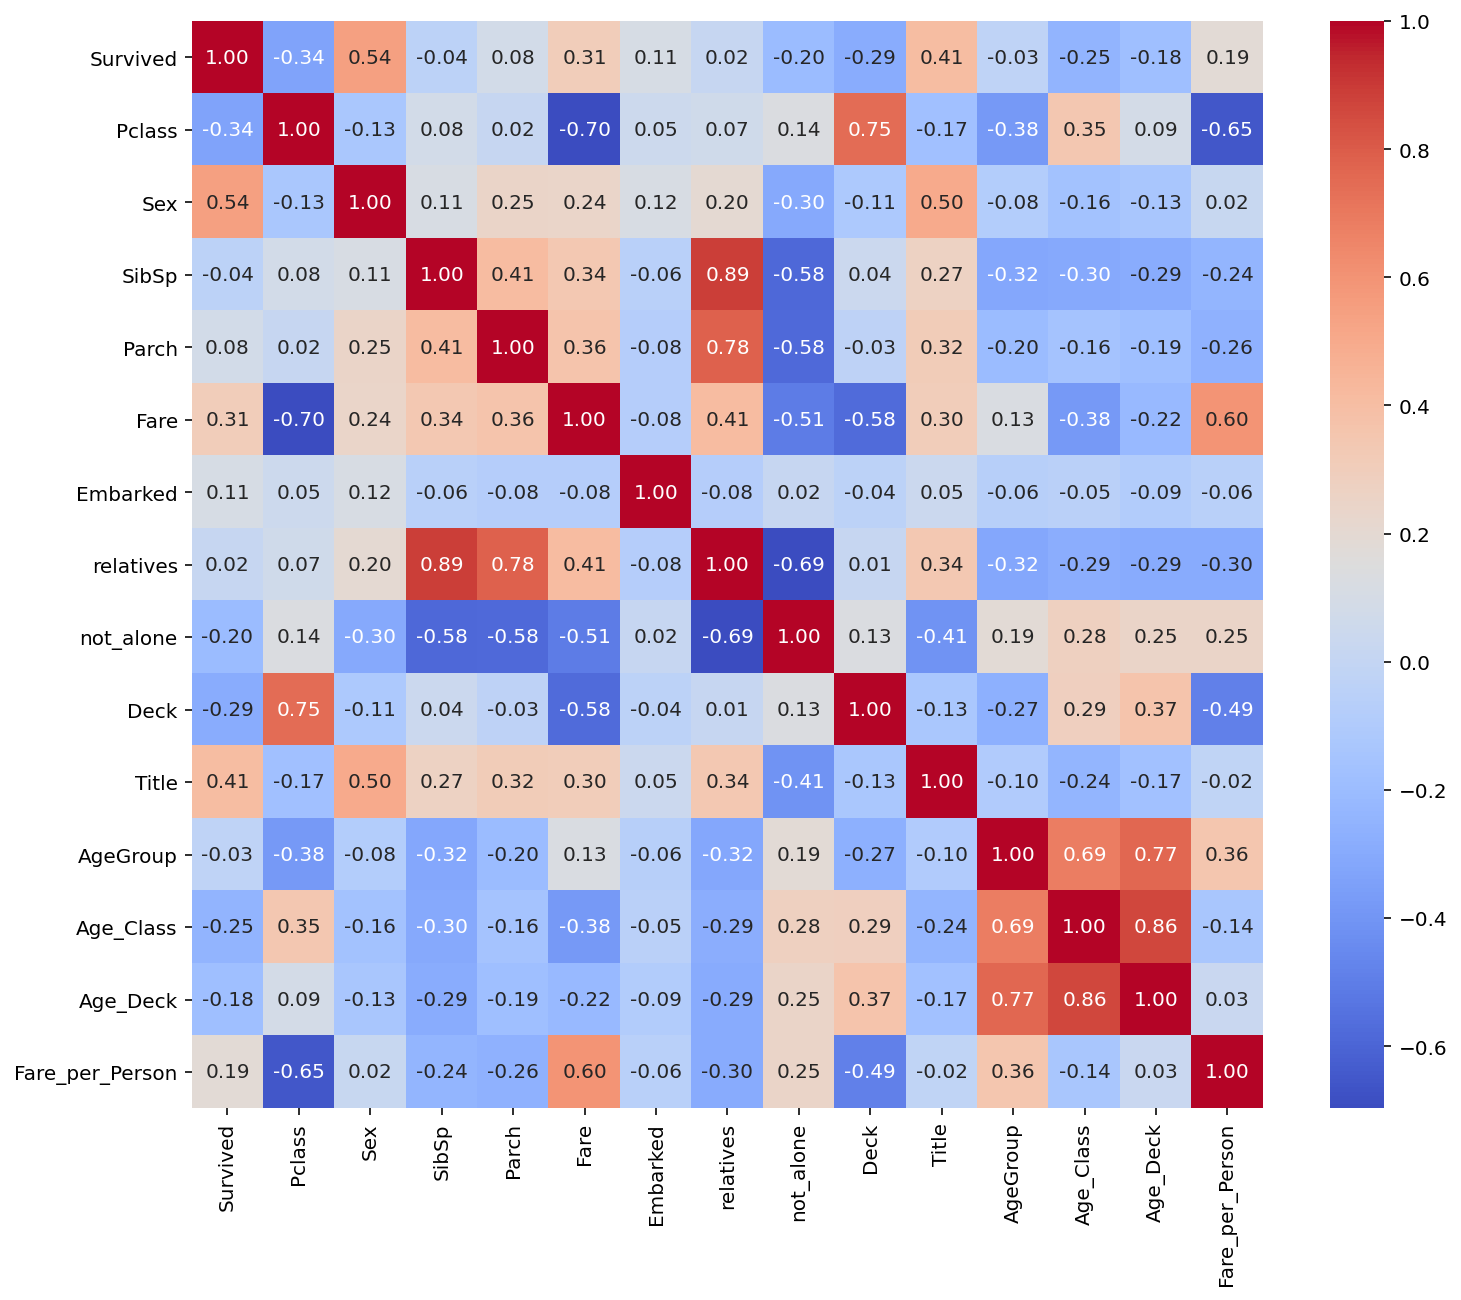

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(), annot = True, fmt = ".2f", cmap = "coolwarm")

## Machine Learning ##

We now start to learn from the train set. We will apply different classification algorithms and check which one has the best performance on the train set. We start to creat the training features tables, the train calssification column and the test features matrix.

In [41]:
from sklearn.model_selection import train_test_split
X_train = df_train.drop('Survived',axis =1)
X_test = df_test.drop(['PassengerId','Survived'], axis =1).copy()
Y_train = df_train['Survived']
X_valid = X_train
Y_valid = Y_train
#X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)
Y_test = df_test['Survived']
display(X_train, X_test)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,AgeGroup,Age_Class,Age_Deck,Fare_per_Person
0,3,0,1,0,0,0,1,0,8,1,2,6,16,0
1,1,1,1,0,3,1,1,0,3,3,5,5,15,1
2,3,1,0,0,0,0,0,1,8,2,3,9,24,0
3,1,1,1,0,3,0,1,0,3,3,5,5,15,1
4,3,0,0,0,1,0,0,1,8,1,5,15,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,1,0,0,1,8,5,3,6,24,1
887,1,1,0,0,2,0,0,1,2,2,2,2,4,2
888,3,1,1,2,2,0,3,0,8,2,0,0,0,0
889,1,0,0,0,2,1,0,1,3,1,3,3,9,2


,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,AgeGroup,Age_Class,Age_Deck,Fare_per_Person
0,3,0,0,0,0,2,0,1,8,1,2,6,16,0
1,3,1,1,0,0,0,1,0,8,3,6,18,48,0
2,2,0,0,0,1,2,0,1,8,2,6,12,48,1
3,3,0,0,0,1,0,0,1,8,3,3,9,24,1
4,3,1,1,1,1,0,2,0,8,1,2,6,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,0,1,0,0,1,8,1,3,9,24,1
414,1,1,0,0,4,1,0,1,3,1,5,5,15,4
415,3,0,0,0,0,0,0,1,8,3,6,18,48,0
416,3,0,0,0,1,0,0,1,8,3,5,15,40,1


We now start to define and apply the classification learning algorithms.

In [42]:
# Stochastic Gradient Descent #
acc_sgd_min = 60
for k in range(1,20):
    sgd = linear_model.SGDClassifier(max_iter = k, tol = None)
    sgd.fit(X_train,Y_train)
    Y_pred_sgd = sgd.predict(X_test)
    acc_sgd = round(sgd.score(X_valid,Y_valid)*100, 2)
    if acc_sgd > acc_sgd_min : 
        print(acc_sgd,acc_sgd_min,k)
        acc_sgd_min = acc_sgd
        best_k = k

print('for {} iteration the SGD algorithm perform with accuracy {}'.format(best_k,acc_sgd_min))

68.69 60 3
77.78 68.69 7


79.69 77.78 9


for 9 iteration the SGD algorithm perform with accuracy 79.69


In [43]:
# Random Forest #
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
acc_rf = round(rf.score(X_valid,Y_valid)*100,2)
print('for 250 estimators Random Forest has accuracy {}'.format(acc_rf))

for 250 estimators Random Forest has accuracy 92.37


In [44]:
# Logistic Regression #
lr = LogisticRegression(max_iter = 250)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
acc_lr = round(lr.score(X_valid,Y_valid)*100,2)
print('the Logisti Regression algorithm perform with accuracy {}'.format(acc_lr))

the Logisti Regression algorithm perform with accuracy 82.04


In [45]:
# K-Nearest Neighbor Algorithm #
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_valid,Y_valid)*100,2)
print('for 3 neighbor, K-Nearest Neighbor Algorithm accuracy {}'.format(acc_knn))

for 3 neighbor, K-Nearest Neighbor Algorithm accuracy 85.3


In [46]:
# Gaussian Naive Bayes #
gnb = GaussianNB()
gnb.fit(X_valid,Y_valid)
Y_pred_gnb = gnb.predict(X_test)
acc_gnb = round(gnb.score(X_valid,Y_valid)*100,2)
print('Gaussian Naive Bayes has accuracy {}'.format(acc_gnb))


Gaussian Naive Bayes has accuracy 79.01


In [47]:
# Perceptron #
per = Perceptron(max_iter=13)
per.fit(X_train, Y_train)
Y_pred_per = per.predict(X_test)
acc_per = round(per.score(X_valid, Y_valid) * 100, 2)
print('for 5 iteration,Perceptron has accuracy {}'.format(acc_per))

for 5 iteration,Perceptron has accuracy 80.02


In [48]:
# Linear Support Vector Machine #
lsvm = LinearSVC(max_iter = 15000) #even when reached the convergence the value is the same
lsvm.fit(X_train, Y_train)
Y_pred_lsvm = lsvm.predict(X_test)
acc_lsvm = round(lsvm.score(X_valid, Y_valid) * 100, 2)
print('Support Vector Machine with linear kernel has accuracy {}'.format(acc_lsvm))

Support Vector Machine with linear kernel has accuracy 81.37


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [49]:
# Decision Tree Classifier #
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
acc_dt = round(dt.score(X_valid, Y_valid) * 100, 2)
print(' Decision Tree Classifier has accuracy {}'.format(acc_dt))

 Decision Tree Classifier has accuracy 92.37


We put together all the accuragy to get the following table

In [50]:
models_score = pd.DataFrame({'Model' : ['Stochastic Gradiendt Descent','Random Forest', 'Logistic Regression', 'K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Perceptron', 'Linear Support Vector Machine', 'Decision Tree Classifier'], 'Accuracy Score': [acc_sgd,acc_rf, acc_lr, acc_knn, acc_gnb, acc_per, acc_lsvm,acc_dt]})
models_score = models_score.sort_values(by = 'Accuracy Score', ascending = False)
models_score = models_score.set_index('Accuracy Score')
display(models_score)

,Model
Accuracy Score,
92.37,Random Forest
92.37,Decision Tree Classifier
85.30,K-Nearest Neighbor
82.04,Logistic Regression
81.37,Linear Support Vector Machine
80.02,Perceptron
79.01,Gaussian Naive Bayes
74.07,Stochastic Gradiendt Descent


We plot also useful curves that help us to understand better how the algorithm perform.

None


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

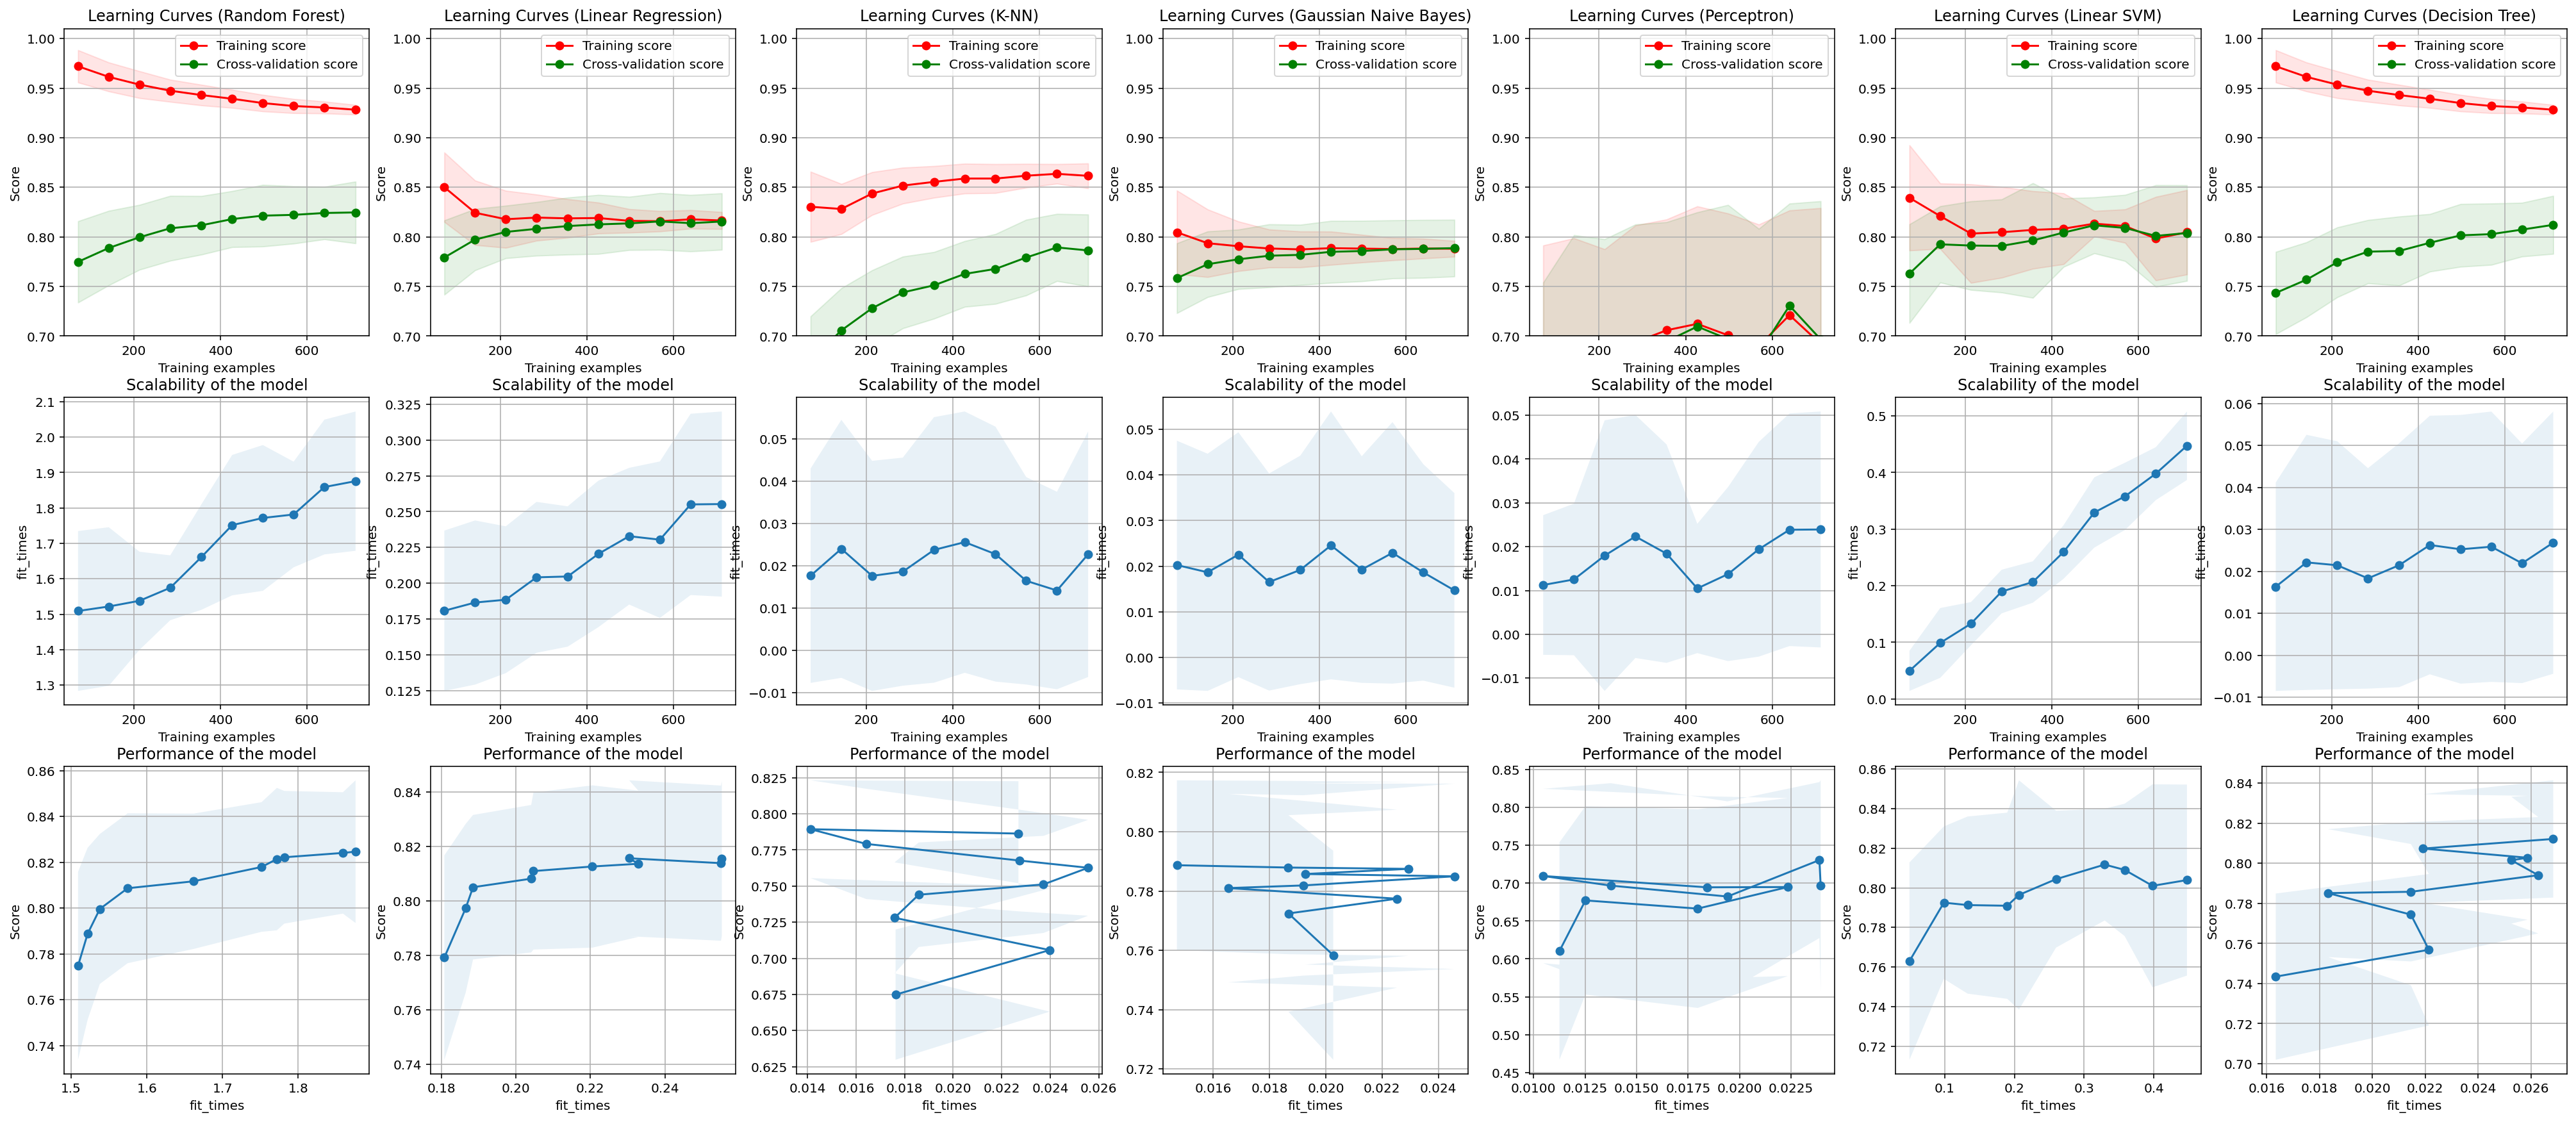

In [51]:
from PlotLearning import plot_learning_curve
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit
X_train_learn = df_train.drop('Survived',axis =1)
Y_train_learn = df_train['Survived']
fig, axes = plt.subplots(3, 7, figsize=(35, 15))



# Random Forest #
title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators = 150)
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
# Logistic Regression #
title = "Learning Curves (Linear Regression)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# K-Nearest Neighbor #
title = "Learning Curves (K-NN)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors=3)
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 2], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)
# Gaussian Naive Bayes #
title = "Learning Curves (Gaussian Naive Bayes)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = GaussianNB()
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 3], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# Perceptron #
title = "Learning Curves (Perceptron)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = Perceptron(max_iter=13)
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 4], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# Linear Support Vector Machine #
title = "Learning Curves (Linear SVM)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = LinearSVC(max_iter = 2000)
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 5], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

# Decision Tree Classifier #
title = "Learning Curves (Decision Tree)"
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train_learn, Y_train_learn, axes=axes[:, 6], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

### Cross Validation ###
We did not validate the data with cross validation. We will repeat the random forest algorithm splitting the training set in k-fold cross validation subsets.

In [52]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators = 100)
acc_sc = cross_val_score(rf,X_train, Y_train, cv=10, scoring = "accuracy")
print("Random Forest Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc,acc_sc.mean(),acc_sc.std()))


Random Forest Scores: [0.75555556 0.83146067 0.76404494 0.82022472 0.86516854 0.82022472
 0.83146067 0.79775281 0.85393258 0.83146067], Mean: 0.8171285892634208, Standard Deviation: 0.03358913755570442


So the random forest classifier has actually an accuracy mean of 81% with an error of 3%. Therefore is natural ascking if the K-nearest neighbour can actually beat the random forest after cross validation

In [53]:
knn = KNeighborsClassifier(n_neighbors=3)
acc_sc_knn = cross_val_score(knn,X_train, Y_train, cv=10, scoring = "accuracy")
print("K-NN Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc_knn,acc_sc_knn.mean(),acc_sc_knn.std()))

K-NN Scores: [0.77777778 0.76404494 0.75280899 0.82022472 0.85393258 0.76404494
 0.86516854 0.7752809  0.82022472 0.78651685], Mean: 0.7980024968789013, Standard Deviation: 0.03746067340838948


In [54]:
lr = LogisticRegression(max_iter = 250)
acc_sc_lr = cross_val_score(lr,X_train, Y_train, cv=10, scoring = "accuracy")
print("Logistic Regression Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc_lr,acc_sc_lr.mean(),acc_sc_lr.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression Scores: [0.81111111 0.82022472 0.76404494 0.85393258 0.82022472 0.79775281
 0.83146067 0.83146067 0.82022472 0.80898876], Mean: 0.8159425717852684, Standard Deviation: 0.022529545315547166


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
gnb = GaussianNB()
acc_sc_gnb = cross_val_score(gnb,X_train, Y_train, cv=10, scoring = "accuracy")
print("Gaussia Naive Bayes Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc_gnb,acc_sc_gnb.mean(),acc_sc_gnb.std()))

Gaussia Naive Bayes Scores: [0.73333333 0.76404494 0.74157303 0.7752809  0.79775281 0.74157303
 0.80898876 0.82022472 0.83146067 0.83146067], Mean: 0.7845692883895131, Standard Deviation: 0.036426682099689224


In [56]:
lsvm = LinearSVC(max_iter = 20000)
acc_sc_lsvm = cross_val_score(lsvm,X_train, Y_train, cv=10, scoring = "accuracy")
print("Linear Support Vector Machine Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc_lsvm,acc_sc_lsvm.mean(),acc_sc_lsvm.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear Support Vector Machine Scores: [0.81111111 0.80898876 0.76404494 0.86516854 0.80898876 0.79775281
 0.82022472 0.79775281 0.80898876 0.80898876], Mean: 0.8092009987515605, Standard Deviation: 0.023577336801343763


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [57]:
dt = DecisionTreeClassifier()
acc_sc_dt = cross_val_score(dt,X_train, Y_train, cv=10, scoring = "accuracy")
print("Decision Tree Scores: {}, Mean: {}, Standard Deviation: {}".format(acc_sc_dt,acc_sc_dt.mean(),acc_sc_dt.std()))

Decision Tree Scores: [0.81111111 0.84269663 0.76404494 0.76404494 0.84269663 0.83146067
 0.80898876 0.82022472 0.85393258 0.78651685], Mean: 0.8125717852684146, Standard Deviation: 0.030568980025554898


As we seen they are close but the random forest has a slightly better accuracy. We then decide to increase the score for the random forest. 

### Features Importance ###
We know check which feature is the most important for our random forest algorithm in order to make a prediction. 

In [58]:
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train,Y_train)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values(by= 'importance', ascending = False).set_index('feature')
display(importances)

,importance
feature,
Title,0.197
Sex,0.179
Age_Deck,0.076
Pclass,0.075
Fare,0.075
Age_Class,0.067
Deck,0.064
relatives,0.055
Embarked,0.050


<AxesSubplot:xlabel='feature'>

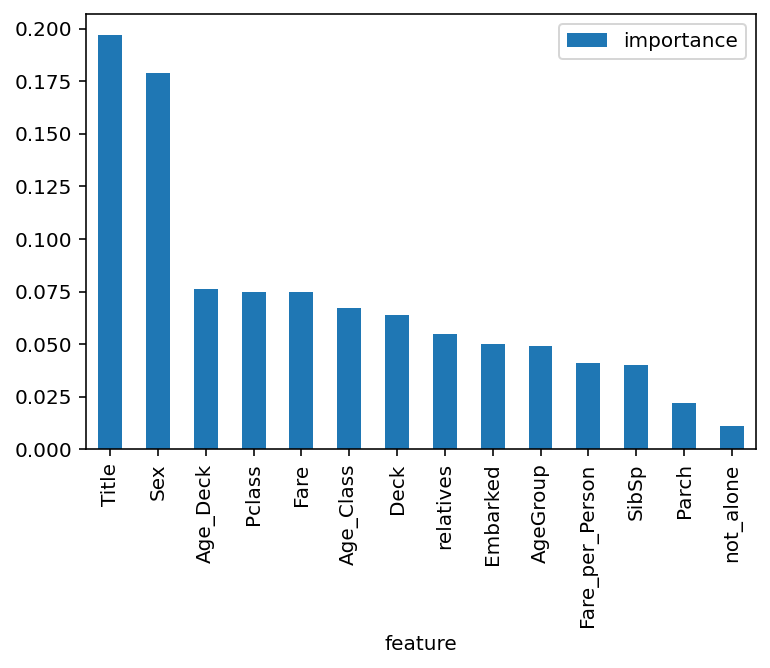

In [59]:
importances.plot.bar()

So Title and the Sex are the one with the most influence in predicting whether a person survive or not on the Titanic. On the other hand the number of parents/children and to be alone or not are not significant for the prediction. We will then drop this lasttwo features in order to avoid overfitting problem.

In [60]:
X_train = X_train.drop(['Parch','not_alone'],axis = 1)
X_test = X_test.drop(['Parch','not_alone'],axis = 1)
# Training again the Random Forest #
rf = RandomForestClassifier(n_estimators = 100,oob_score=True)
rf.fit(X_train,Y_train)
Y_pred_rf_new = rf.predict(X_test)
acc_rf_new = round(rf.score(X_train,Y_train)*100,2)
print('The new trained random forest has accuracy : {}%'.format(acc_rf_new))
print("oob score:", round(rf.oob_score_, 2)*100, "%")

The new trained random forest has accuracy : 92.37%
oob score: 83.0 %


The random forest without the 2 features as a better accuracy of before.

### Tuning the hyperparameters of the random forest ###
We know proceed to explore the parameters options for the random forest. The automatic search is in the commented code below. Unfortunately due to its long time to run we commented it. The result are used in the next code cell

In [61]:
#param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
#from sklearn.model_selection import GridSearchCV, cross_val_score
#rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
#clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
#clf.fit(X_train, Y_train)
#clf.bestparams

In [62]:
X_train = df_train.drop('Survived',axis =1)
X_test = df_test.drop(['PassengerId','Survived'], axis =1).copy()
Y_train = df_train['Survived']

#X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.25, random_state=1)
Y_test = df_test['Survived']

rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf.fit(X_train, Y_train)
Y_pred_rf= rf.predict(X_test)
acc_rf_new = round(rf.score(X_valid,Y_valid)*100,2)
print('The new trained random forest has accuracy : {}%'.format(acc_rf_new))
print("oob score:", round(rf.oob_score_, 4)*100, "%")

The new trained random forest has accuracy : 89.11%
oob score: 83.28 %


Since we are dealing with a classification problem we can have a better idea of the performance of our algorithm with different score estimators. Firt we need to understand the precision and recall of the Random Forest on our training set and to that we need the matrix of True Negative, False Negative, true Positive and False Positive.

In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(rf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[485,  64],
       [ 96, 246]])

The matrix tell us that we have 383 true Negative i.e. our algoritm predicted correctly that 494 passengers of the cross validation set (in this case it coincided with the full training set) did not survived. The trained Random forest also predict correctly that 173 passengers will survive (true Positive), 38 were incorrectly predicted to survive (False Positive), and finally 74 passengers were incorrectly labeled as not survived (False negative). We have then the following F1-score

In [64]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
P = precision_score(Y_train, predictions)
R = recall_score(Y_train, predictions)
print("Precision:", P)
print("Recall:", R)
f1_score(Y_train, predictions) == 2*(P*R)/(P+R)
print(2*(P*R)/(P+R))

Precision: 0.7935483870967742
Recall: 0.7192982456140351
0.754601226993865


## Threshold selection ##
A classifier algorithm usually predict a certain label when the probability computed by the trained algorithm is bigger than a certain threshold. Varying the threshold result in varying the precision and the recall score. Accordingly to what score we want to emphatise (precisio-recall trade off) we can select a different threshold. We start then plotting the threshold curve.

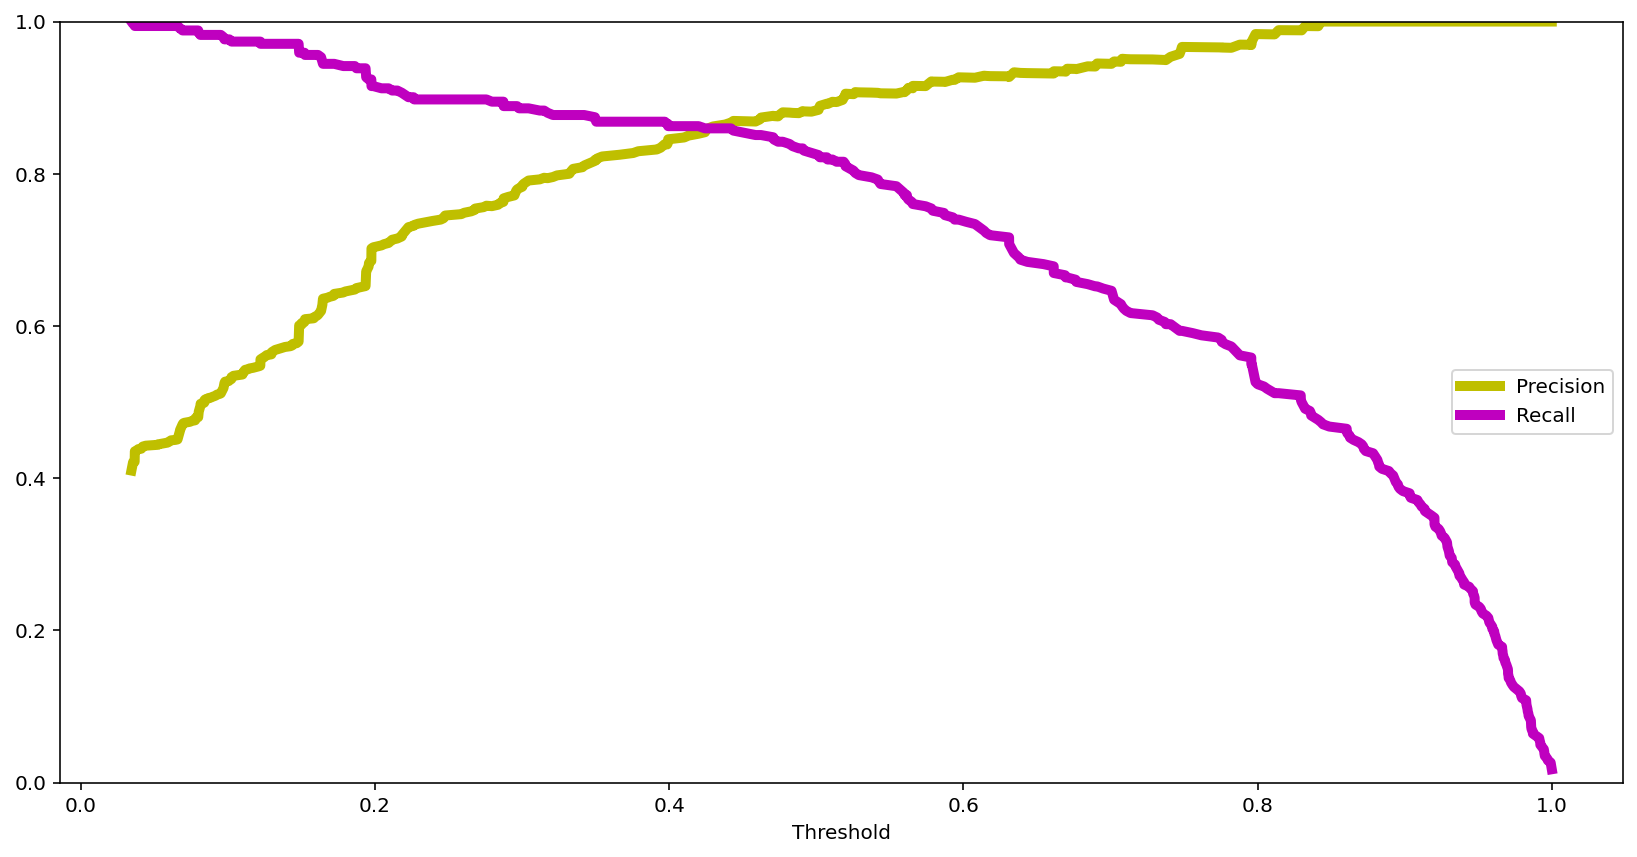

In [65]:
from sklearn.metrics import precision_recall_curve
y_prob = rf.predict_proba(X_train)
y_prob = y_prob[:,1]
precision, recall, threshold = precision_recall_curve(Y_train, y_prob)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "y-", label="Precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "m", label = "Recall", linewidth = 5)
    plt.xlabel('Threshold')
    plt.legend(loc='right')
    plt.ylim([0,1])

plt.figure(figsize = (14,7))
plot_precision_and_recall(precision,recall,threshold)
plt.show()

As we see the recall decay rapidly when the precision is roughly 85%. So it is better to have the threshold set before it. For example if we want a precision of 80% we need a threshold slightly higher than 0.4. 
We can also plot the precision aigainst the recall for a better idea of the trade off.

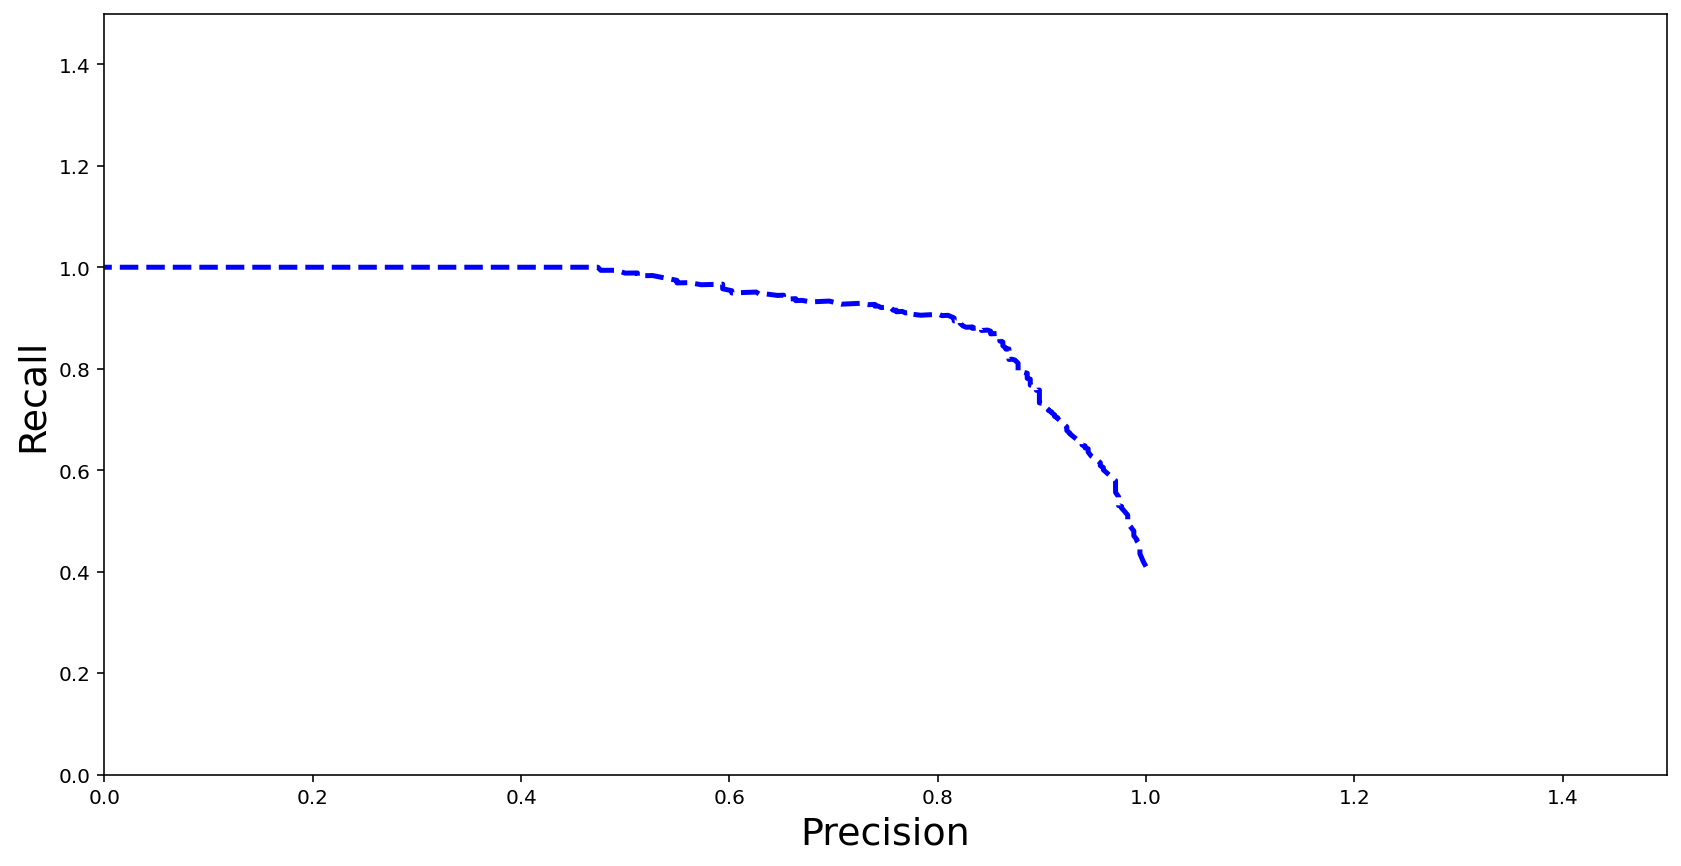

In [66]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "b--", linewidth=2.5)
    plt.ylabel("Recall", fontsize=19)
    plt.xlabel("Precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

A final estimation on the quality of our algorithm is given by the ROC (Receiving operating characteristic) curve. This is an estimator for binary classifier and it plot the true positive (TPR or Recall) against the false positive rate (FPR) at various threshold value. The area below is called AUC (mathematician have not enough fantasy) and estimates the diagnose ability of our binary classifier. A classifier that is 100% correct has AUC =1.0 while a random classifier has AUC = 0.5 (and a totally wrong has AUC = 0.0)

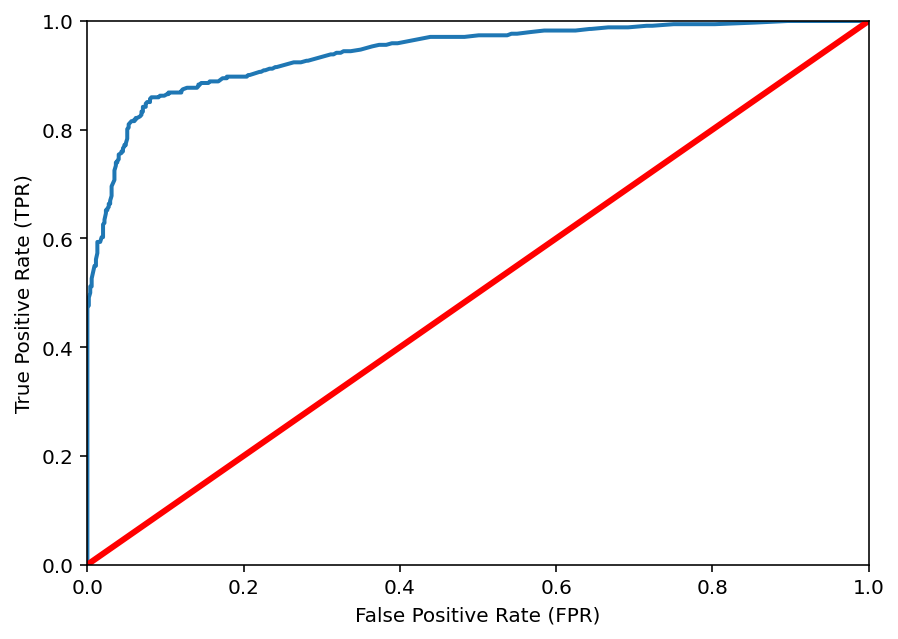

In [67]:
from sklearn.metrics import roc_curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_prob)
def plot_roc_curve(false_positive_rate, true_positive_rate, label = None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth = 2)
    plt.plot([0,1],[0,1], 'r', linewidth = 3)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

plt.figure(figsize=(7,5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the plot represents a purely random binary classifier, so as far and above our line is (the blue one) the better our algorithm perform. In this case our random forest is performing quite well.
The final estimation for our binary classifier is the AUC value. more close is to one the better is our algorithm.

In [68]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_prob)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9414352517602446


That is very promising to have a nice score on the test set.

### Test Set Data Manipulation ###
The test set from the Kaggle repository does not come with the Survived column, so that we can not test the accuracy of our prediction. However, the Titanic tragedy is deeply studied in details from long time so a research in google lead to a list of the passengers with their survival data. However, it required some manipulation to finally match our test set with the googled  full labeled data. To not ruin the spirit of the Kaggle competition we do not report the full labeled dataframe.

In [93]:
df_labeled = pd.read_csv('Titanic labeled full.csv')
df_labeled.describe()

,Surname,First Names,Age,Boarded,Survivor (S) or Victim (†)
count,1317,1317,1317,1317,1317
unique,894,1143,79,4,2
top,Sage,Mr John,22,Southampton,†
freq,11,13,62,912,833


In [94]:
df_labeled.head()

,Surname,First Names,Age,Boarded,Survivor (S) or Victim (†)
0,Allen,Miss Elisabeth Walton,29,Southampton,S
1,Allison,Mr Hudson Joshua Creighton,30,Southampton,†
2,Allison,Mrs Bessie Waldo,25,Southampton,†
3,Allison,Miss Helen Loraine,2,Southampton,†
4,Allison,Master Hudson Trevor,11m,Southampton,S


First of all we want a 0,1 labeling for the survival. 

In [95]:
df_labeled.loc[df_labeled['Survivor (S) or Victim (†)']== 'S', 'Survived' ] = 1
df_labeled.loc[df_labeled['Survivor (S) or Victim (†)']== '†', 'Survived' ] = 0
df_labeled['Survived'] = df_labeled['Survived'].astype(int)
df_labeled.head()

,Surname,First Names,Age,Boarded,Survivor (S) or Victim (†),Survived
0,Allen,Miss Elisabeth Walton,29,Southampton,S,1
1,Allison,Mr Hudson Joshua Creighton,30,Southampton,†,0
2,Allison,Mrs Bessie Waldo,25,Southampton,†,0
3,Allison,Miss Helen Loraine,2,Southampton,†,0
4,Allison,Master Hudson Trevor,11m,Southampton,S,1


Then we extract the First Names and the titles

In [96]:
df_labeled['FirstName'] = df_labeled['First Names']
df_labeled['Title'] = df_labeled.FirstName.str.extract('([A-Za-z]+) ', expand=False)
df_labeled['FirstName'] = df_labeled.FirstName.str.extract(' ([A-Za-z]+)', expand=False)

then we create an embarked column 

In [98]:
ports = {'Southampton':'S', 'Cherbourg':'C',  'Queenstown':'Q'}
df_labeled['Embarked'] = df_labeled['Boarded'].map(ports) 

Now we look at our test set

In [99]:
df_test = pd.read_csv('dataset_test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0


We need to create new columns in order to be able to compare the sets.

In [101]:
df_test['Surname'] = df_test.Name.str.extract('([A-Za-z]+)\,', expand=False)
df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
df_test['FirstName'] = df_test.Name.str.extract('\. ([A-Za-z]+)', expand=False)

Then we start to compare the two data frames

In [102]:
survived = pd.DataFrame(columns=['Survived'])
over_match= []
no_match = []
problem_names = []
for i in range(len(df_test)):
    data_row = df_labeled[(df_labeled['Surname'] == df_test['Surname'].iloc[i]) & (df_labeled['Title'] == df_test['Title'].iloc[i]) & (df_labeled['Embarked'] == df_test['Embarked'].iloc[i])]
    data_surv = data_row['Survived']
    if len(data_surv) == 1:
        survived.loc[i] = (int(data_surv))
    elif len(data_surv) > 1 :
        data_row = data_row[data_row['FirstName'] == df_test['FirstName'].iloc[i]]
        data_surv = data_row['Survived']
        if len(data_surv)>1:
            over_match.append(i)
            survived.loc[i] = 3
        elif len(data_surv)==1: 
            survived.loc[i] = (int(data_surv))
        else:
            problem_names.append(i)
            survived.loc[i] = 5
    else:
        no_match.append(i)
        survived.loc[i] = 4

In [104]:
print(len(no_match),len(problem_names),len(over_match))

84 8 1


Since the numbers are of missed comparison are not huge we proceed addressing them one by one using the following code

and then we are able to have a full labeled test set. Obviously we need to perform the same modification to this set that we did for our training set. We did it from the start and we have

In [109]:
display(X_test.head())
display(Y_test.head())

,Pclass,Sex,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,AgeGroup,Age_Class,Age_Deck,Fare_per_Person
0,3,0,0,0,0,2,0,1,8,1,2,6,16,0
1,3,1,1,0,0,0,1,0,8,3,6,18,48,0
2,2,0,0,0,1,2,0,1,8,2,6,12,48,1
3,3,0,0,0,1,0,0,1,8,3,3,9,24,1
4,3,1,1,1,1,0,2,0,8,1,2,6,16,0


0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

We can now proceed the score of our algorithm.

In [110]:
Y_pred_test = rf.predict(X_test)
acc_rf_new = round(rf.score(X_test,Y_test)*100,2)

In [111]:
acc_rf_new

73.21

It is not a fantastic score but either too bad. Now let see what happen with our implementation of a Neural Network.

### Neural Network ### 

We now try our implementation of the Neural Network.

In [115]:
from NN_Classifier_Python import NeuralNetwork_Classifier

We initialise a Neural Netwoek with a single layer and 14 nodes.

In [116]:
nn = NeuralNetwork_Classifier([14])

[14]


We now fit the fit the Neural Network with the different optimisation algorithms

In [55]:
optimal_f = nn.fit(X_train, Y_train, max_iter = 400)
print('Score of fmin on Training set: {}'.format(round(nn.score(optimal_f, X_train,Y_train)*100,2)))
print('Score of fmin on Test set: {}'.format(round(nn.score(optimal_f, X_test,Y_test)*100,2)))

         Current function value: 0.689509
         Iterations: 400
         Function evaluations: 685
         Gradient evaluations: 685
Score of fmin on Training set: 87.43
Score of fmin on Test set: 73.68


In [56]:
optimal_B,_,theta_history_B = nn.fit(X_train, Y_train, max_iter = 300, optim_fun = 'GradDesc', learning_rate = 0.015, momentum = 0.6)
print('Score of BGD on Training set: {}'.format(round(nn.score(optimal_B, X_train,Y_train)*100,2)))
print('Score of BGD on Test set: {}'.format(round(nn.score(optimal_B, X_test,Y_test)*100,2)))

The value of the cost function is: 1.2272729472282584
Score of BGD on Training set: 65.88
Score of BGD on Test set: 64.59


In [57]:
optimal_MB,_,theta_history_MB = nn.fit(X_train, Y_train, max_iter = 300, optim_fun = 'GradDesc', learning_rate = 0.0015, momentum = 0.8, num_batches = 100)
print('Score of MBGD on Training set: {}'.format(round(nn.score(optimal_MB, X_train,Y_train)*100,2)))
print('Score of MBGD on Test set: {}'.format(round(nn.score(optimal_MB, X_test,Y_test)*100,2)))

The value of the cost function is: 0.7682466301365172
Score of MBGD on Training set: 83.39
Score of MBGD on Test set: 71.77


In [58]:
optimal_S,_,theta_history_S = nn.fit(X_train, Y_train, max_iter = 30, optim_fun = 'GradDesc', learning_rate = 0.0015, momentum = 0.3, num_batches = len(X_train))
print('Score of MBGD on Training set: {}'.format(round(nn.score(optimal_S, X_train,Y_train)*100,2)))
print('Score of MBGD on Test set: {}'.format(round(nn.score(optimal_S, X_test,Y_test)*100,2)))

The value of the cost function is: 0.2846659721183483
Score of MBGD on Training set: 71.6
Score of MBGD on Test set: 51.67


In [0]:
So that our Neural Network score optimised with the fmin_cg function and minibatch gradient descent does not perform  very far from the random forest algorithm

We plot the Scores of the Batch and Mini Batch Gradient descen against the number of iteration to see the trend.

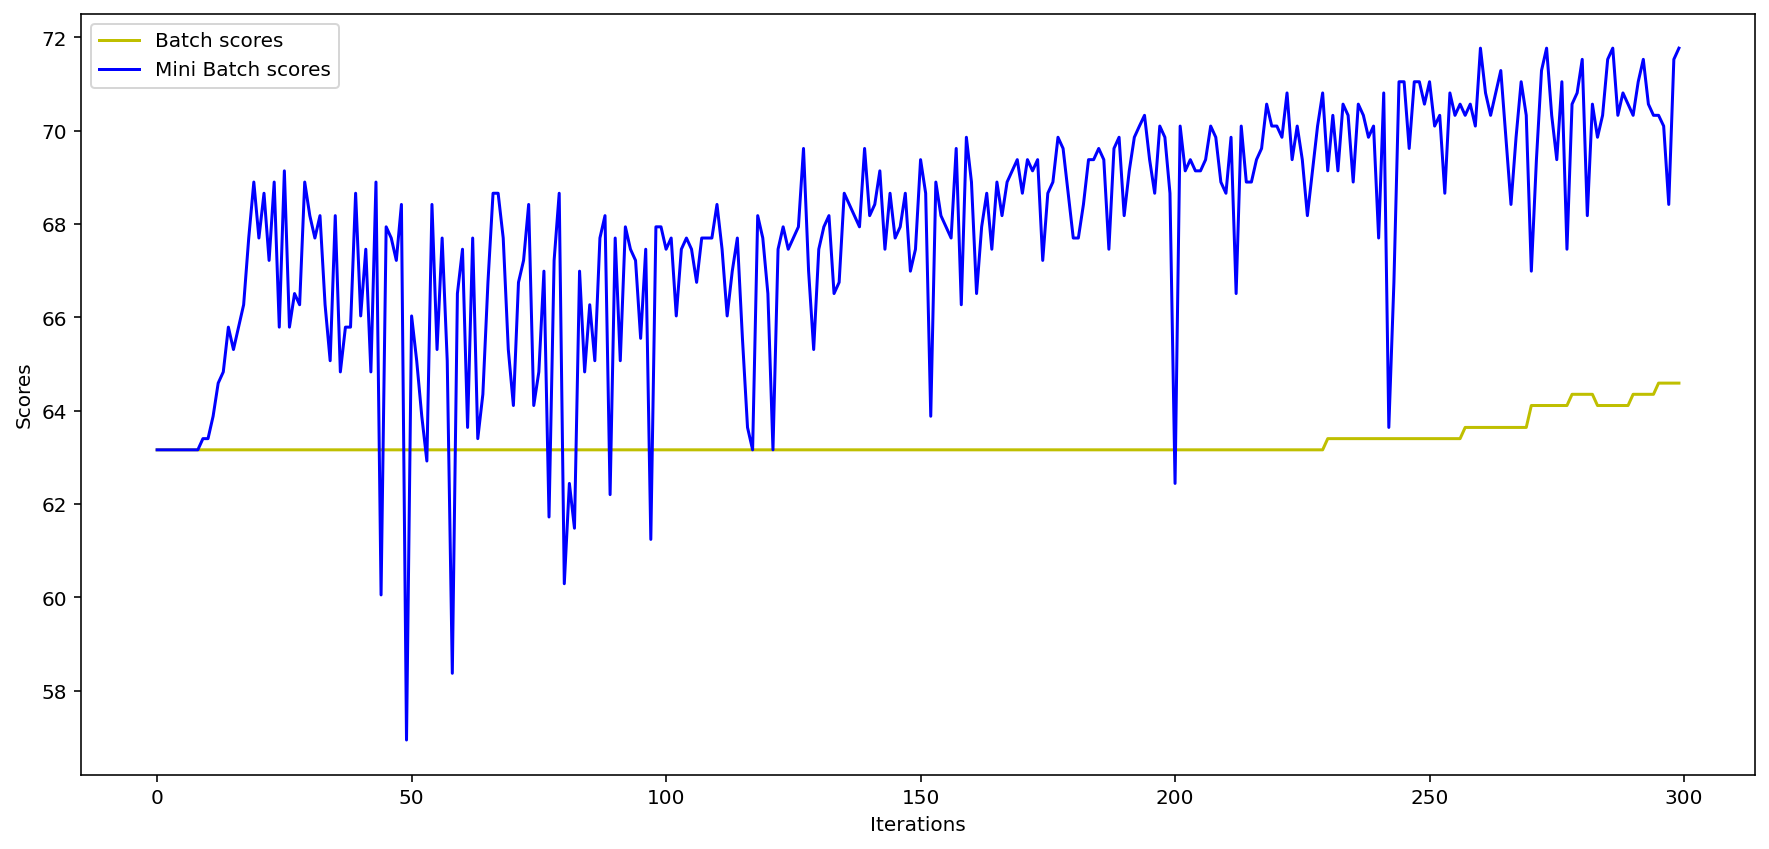

In [60]:
plt.figure(figsize = (15,7))
plt.plot([round(nn.score(theta, X_test,Y_test)*100,2) for theta in theta_history_B], 'y', label = 'Batch scores')
plt.plot([round(nn.score(theta, X_test,Y_test)*100,2) for theta in theta_history_MB],'b-', label = 'Mini Batch scores' )
plt.xlabel('Iterations')
plt.ylabel('Scores')
plt.legend()
plt.show()

In order to see if we are underfitting or overfitting our problem we plot the learning curve of the algorithm.

In [117]:
hidden_layers = [14]
nn = NeuralNetwork_Classifier(hidden_layers)
def learningCurve(X,Y,max_iter = 100, learning_rate = 0.01, momentum = 0.99, batch_size = 1):
    learning_curve = []
    X_t, X_valid, Y_t, Y_valid = train_test_split(X_train, Y_train, test_size=0.20, random_state=1)
    train_sizes=np.linspace(10, 600, 30)
    for i in train_sizes:
        data_train = np.hstack((X_t,np.array(Y_t)[np.newaxis].T))
        data_valid = np.hstack((X_valid,np.array(Y_valid)[np.newaxis].T))
        np.random.shuffle(data_train)
        np.random.shuffle(data_valid)
        X_tr = data_train[:int(i),:-1]
        Y_tr = np.array(data_train[:int(i),-1])
        X_val = data_valid[:int(i),:-1]
        Y_val = np.array(data_valid[:int(i),-1])
        n_batch = int(np.shape(X_tr)[0]//(np.shape(X_tr)[0]*batch_size))

        layers_info = [np.shape(X_tr)[1]] + hidden_layers + [2]
        optimal,Cost_history,theta_history = nn.fit(X_tr, Y_tr, max_iter = max_iter, learning_rate = learning_rate, momentum=momentum, optim_fun = 'GradDesc', num_batches = n_batch, verbose = False)
        learning_curve.append((Cost_history[-1], nn.cost_func_NN(optimal, layers_info, X_val, Y_val),int(i)))
    return learning_curve

[14]


In [71]:
BGD_curve = learningCurve(X_train,Y_train,max_iter = 500, learning_rate = 0.015, momentum = 0.99,batch_size = 1)

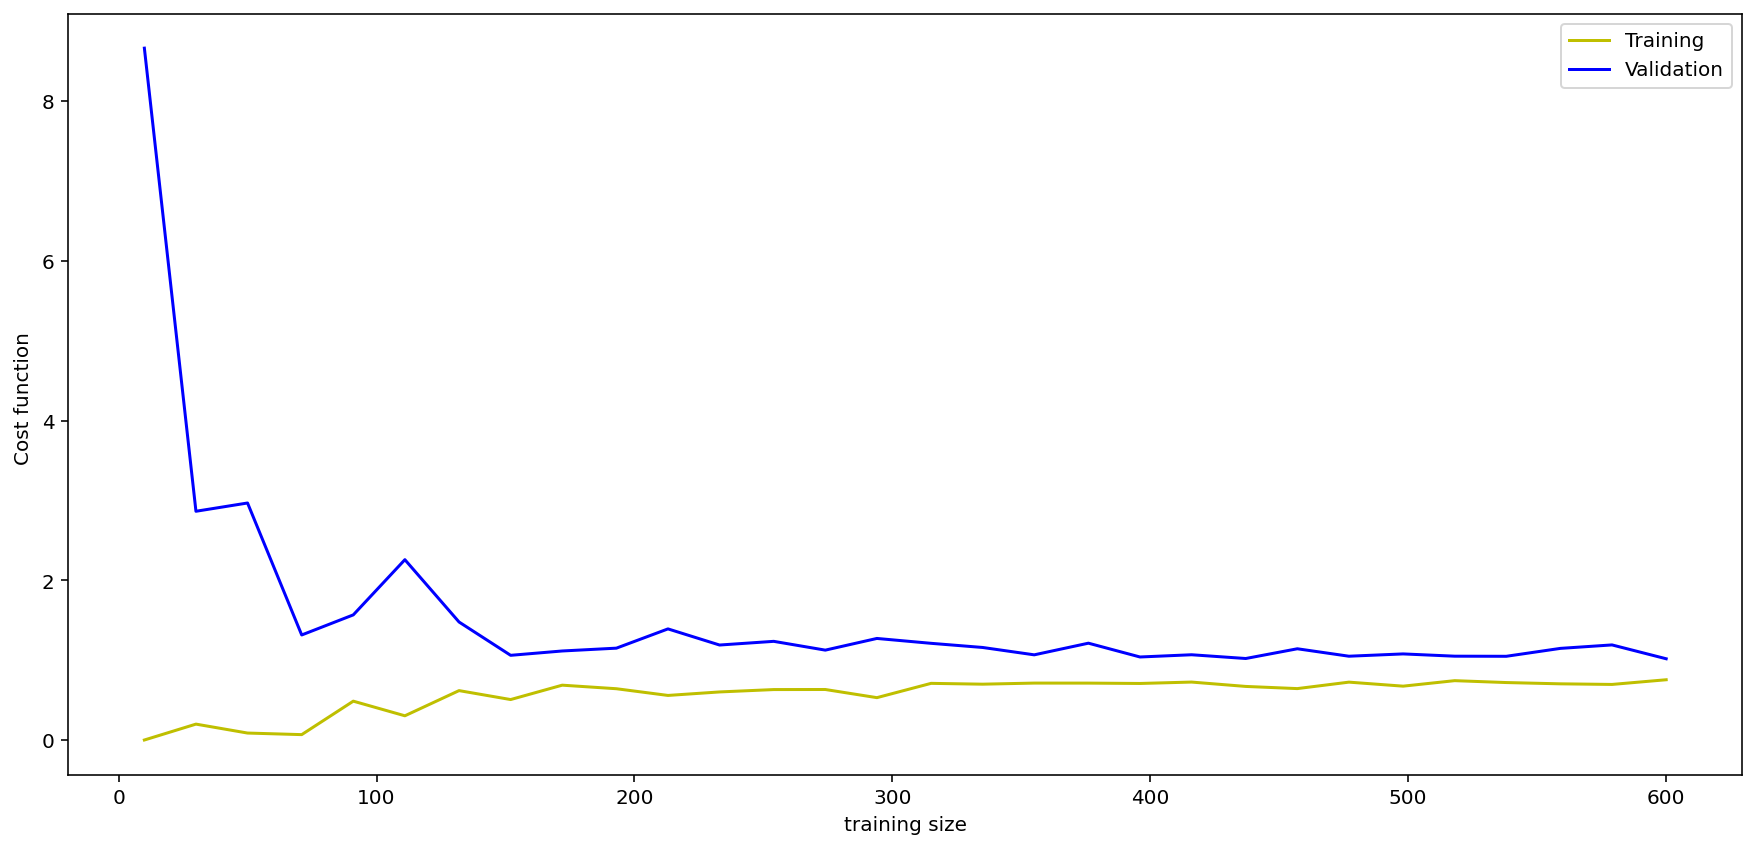

In [72]:
plt.figure(figsize = (15,7))
plt.plot([x[2] for x in BGD_curve],[x[0] for x in BGD_curve],'y', label = 'Training')
plt.plot([x[2] for x in BGD_curve],[x[1] for x in BGD_curve],'b', label = 'Validation')
#plt.plot(valid, 'b', label = 'validation')
plt.xlabel('training size')
plt.ylabel('Cost function ')
#plt.xticks()
plt.legend()